In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x = np.linspace(-1,1,50)

<IPython.core.display.Javascript object>


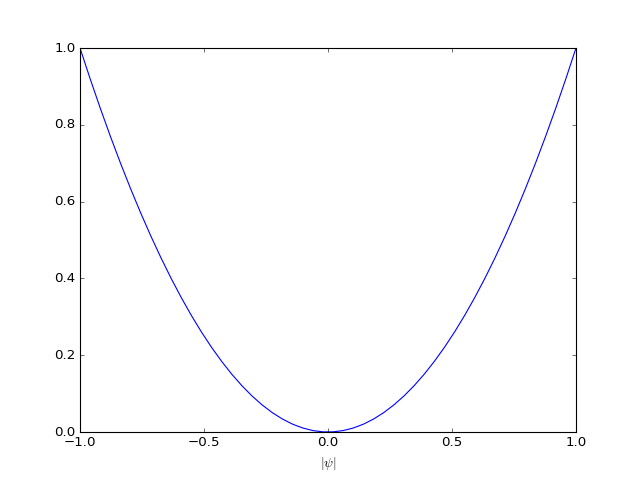

In [12]:
plt.plot(x, x**2, label = 'x1')
plt.xlabel('$|\psi|$')
plt.ylabel('$\rho$')